In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
import string
import nltk
from collections import Counter, OrderedDict
from text_matcher import matcher

In [2]:
def clean_text(text):
    
    text2 = re.sub('!','.',text)
    text2 = re.sub(' \...',' ',text)
    text2 = re.sub('  ',' ',text2)
    char  = [';',':','!','«','»',',','“','”','(',')']
    pattern = '[' + ''.join(char) + ']'
    new_str = re.sub(pattern,'', text2)
    #clean_words = [word for word in new_str.split() if word.lower() not in stopwords_latin]
    #new_str = ' '.join(clean_words)
    new_str = re.sub(r'\? [A-Z]','.',new_str)
    new_str = re.sub(r'\?','',new_str)
    pattern = r"\. ([a-z])"
    new_str = re.sub(pattern, r" \1", new_str)
    string = re.sub('v','u',new_str)
    string = re.sub('j','i',string)

    string = re.sub(r' +',' ',string)
    string = re.sub('- ','',string)
    string = string.lower()
    
    return string

In [3]:
def tf_idf_with_most_common_words(corpus, max_features=1000):

    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

In [4]:
def count(sentence):
    return len(sentence.split())

In [5]:
df = pd.read_excel('lemma_pos_pdv.xlsx')

In [6]:
df['len'] = df['tolemme'].apply(count)
sum(df['len'])

81583

In [9]:
corpus = df['tolemme'].tolist()

In [20]:
file = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/Thomas_de_Capoue_lemmas.xlsx'

In [21]:
capoue = pd.read_excel(file)

In [22]:
capoue['clean'] = capoue['Text'].apply(clean_text)

In [23]:
corpus = df['tolemme'].tolist() + capoue['clean'].tolist()

In [24]:
capoue['len'] = capoue['clean'].apply(count)

In [30]:
corpus

['collegerunt pontifices et pharisei consilium in unum et aduersus principem christianum dominum conuenerunt. quid facimus inquiunt quia hic homo de hostibus sic triumphat si sic ipsum dimittimus omnem sibi subiciet gloriam lombardorum et more cesareo ueniens non tardabit ut posse nobis et locum auferat et destruat gentem nostram. uineam autem domini sabaoth aliis locabit agricolis et bonos absque iudicio male perdet. obstemus ergo principiis ne forte scintilla tenuis in flammam transeat destructiuam et morbus quidem sic fistulare incipiens non abscissus perueniat in medullas. sepe enim uix ferus ignis extinguitur et morbo cronico salubris sero parabitur medicina. nullos igitur huiusmodi sermones principis attendentes percutiamus aiunt acriter ipsum lingua nec sagitta nostra plus lateat sed procedat sic procedat quod feriat sic feriat quod ledat sic ledatur ut iaceat sic prosternatur quod amplius non resurgat et tunc clare uidebimur si sua somnia prosint illi. super cathedram moysi sed

In [25]:
sum(capoue['len'])

71573

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold import TSNE

In [11]:
tfidf_matrix, feature_names = tf_idf_with_most_common_words(corpus, max_features=1000)
matrix_pdv = tfidf_matrix.toarray()
euclidean_distance_matrix = pairwise_distances(matrix_pdv, metric='euclidean')

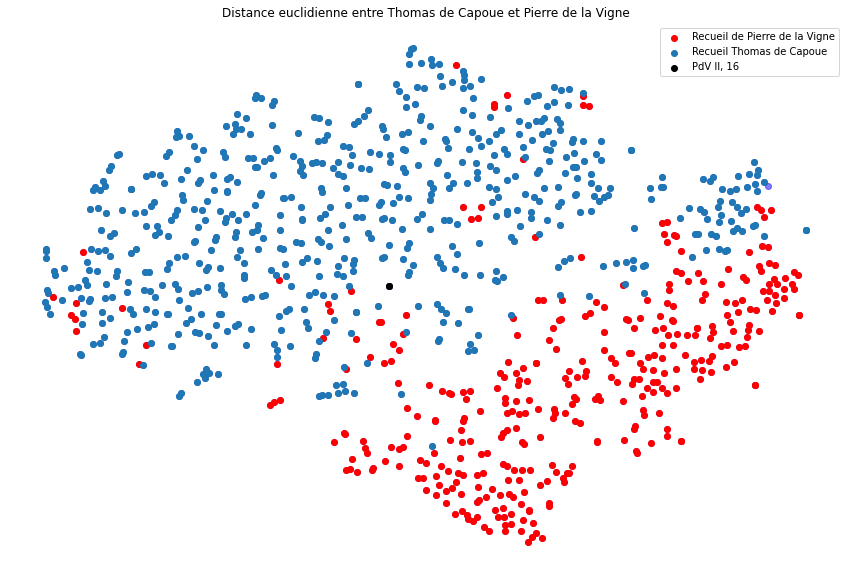

In [28]:
tsne = TSNE(n_components=2, random_state=42)
euclidian_tsne = tsne.fit_transform(euclidean_distance_matrix)

livre = list(range(0,363))
capoue = list(range(364,987))



# Visualization
plt.figure(figsize=(15, 10))
plt.scatter(euclidian_tsne[:, 0], euclidian_tsne[:, 1], color='blue', alpha=0.5)  # All points in blue with some transparency

highlighted_pdv = plt.scatter(euclidian_tsne[livre, 0], euclidian_tsne[livre, 1], color='red', marker='o', label='Recueil de Pierre de la Vigne')

highlighted_capoue = plt.scatter(euclidian_tsne[capoue, 0], euclidian_tsne[capoue, 1], marker='o', label='Recueil Thomas de Capoue')

highlighted_common = plt.scatter(euclidian_tsne[48, 0], euclidian_tsne[48, 1], color='black', marker='o', label='PdV II, 16')


plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Distance euclidienne entre Thomas de Capoue et Pierre de la Vigne')
plt.legend()
plt.axis('off')

plt.savefig('distance_euclidienne_tdc_pdv.png',dpi=300)
plt.show()

In [86]:
phrase1 = df['tolemme'][48]

In [85]:
phrase2 = capoue['clean'][2]

In [87]:
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
vectorizer = CountVectorizer().fit_transform([phrase1, phrase2])
vector1, vector2 = vectorizer.toarray()

In [90]:
similarity = 1 - cosine(vector1, vector2)
print("Cosine similarity:", similarity)

Cosine similarity: 0.8978701542896319


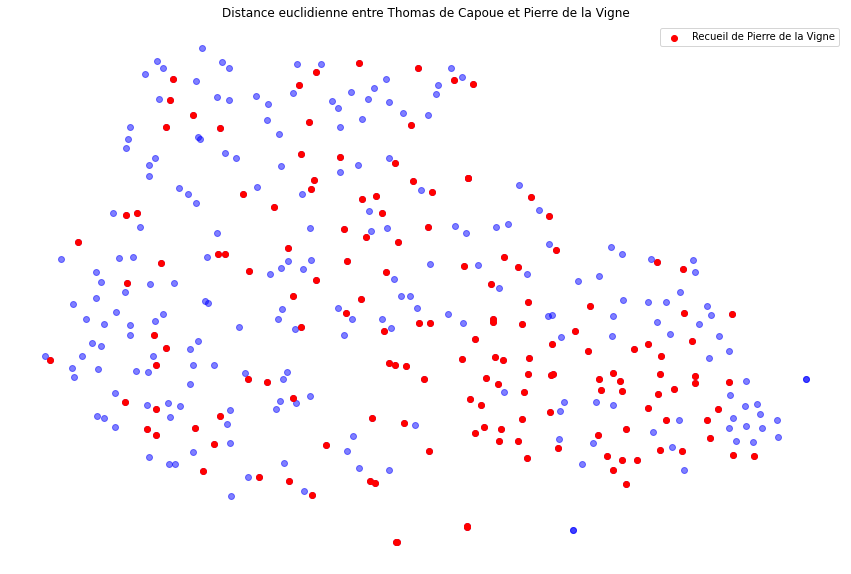

In [59]:
tsne = TSNE(n_components=2, random_state=42)
euclidian_tsne = tsne.fit_transform(euclidean_distance_matrix)

livre = list(range(0,363))

date = liste_index
encyclique = indexes = [0,1,2,3,4,7,8,10,19,20,27,28,29,31]
rocca = [136,181,198,215,216,331,336,339]

# Visualization
plt.figure(figsize=(15, 10))
plt.scatter(euclidian_tsne[:, 0], euclidian_tsne[:, 1], color='blue', alpha=0.5)  # All points in blue with some transparency

highlighted_pdv = plt.scatter(euclidian_tsne[date, 0], euclidian_tsne[date, 1], color='red', marker='o', label='Recueil de Pierre de la Vigne')

#highlighted_ency = plt.scatter(euclidian_tsne[encyclique, 0], euclidian_tsne[encyclique, 1],color='yellow', marker='o', label='Recueil Thomas de Capoue')

#highlighted_rocca = plt.scatter(euclidian_tsne[rocca, 0], euclidian_tsne[rocca, 1], color='black', marker='o', label='PdV II, 16')


plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Distance euclidienne entre Thomas de Capoue et Pierre de la Vigne')
plt.legend()
plt.axis('off')

plt.savefig('distance_euclidienne_tdc_pdv.png',dpi=300)
plt.show()

In [39]:
file = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/PDV_grams.xlsx'

marie = pd.read_excel(file)

In [40]:
dates = marie['Date'].tolist()

In [57]:
df['date'] = dates
x = df[df['date'] > '1245']
liste_index = x.index.tolist()

In [58]:
len(liste_index)

154